In [1]:
import pandas as pd

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

# for encoding with feature-engine
from feature_engine.categorical_encoders import MeanCategoricalEncoder

In [2]:
data = pd.read_csv('creditApprovalUCI.csv')

data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [3]:
# make a list with the categorical variables

vars_categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [4]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data,  # all data
    data['A16'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((483, 16), (207, 16))

## Target mean encoding with pandas

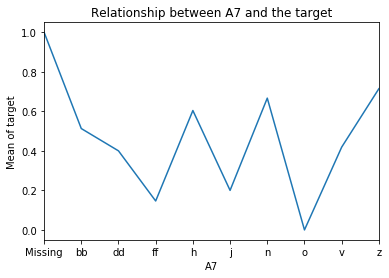

In [5]:
X_train.groupby(['A7'])['A16'].mean().plot()
plt.title('Relationship between A7 and the target')
plt.ylabel('Mean of target')
plt.show()

In [6]:
# let's create a dictionary with the target mean per category
# for the variable A7

ordered_labels = X_train.groupby(['A7'])['A16'].mean().to_dict()

ordered_labels

{'Missing': 1.0,
 'bb': 0.5128205128205128,
 'dd': 0.4,
 'ff': 0.14634146341463414,
 'h': 0.6039603960396039,
 'j': 0.2,
 'n': 0.6666666666666666,
 'o': 0.0,
 'v': 0.4187725631768953,
 'z': 0.7142857142857143}

In [7]:
# replace the labels with the target mean

X_train['A7'] = X_train['A7'].map(ordered_labels)
X_test['A7'] = X_test['A7'].map(ordered_labels)

C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [8]:
# let's inspect the result

X_train['A7'].head()

596    0.418773
303    0.418773
204    0.418773
351    0.146341
118    0.418773
Name: A7, dtype: float64

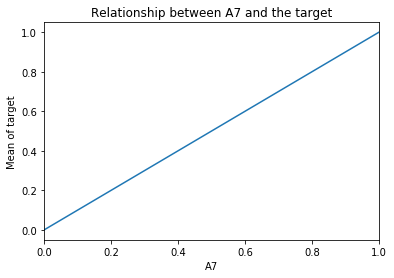

In [9]:
X_train.groupby(['A7'])['A16'].mean().plot()
plt.title('Relationship between A7 and the target')
plt.ylabel('Mean of target')
plt.show()

## Target mean encoding with Feature-Engine

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['A16'], axis=1),  # predictors
    data['A16'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

In [11]:
# let's create the encoder

mean_enc = MeanCategoricalEncoder(variables=None)

In [12]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

mean_enc.fit(X_train, y_train)

MeanCategoricalEncoder(variables=['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10',
                                  'A12', 'A13'])

In [13]:
# variables that will be encoded

mean_enc.variables

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [14]:
# in the encoder dict we can observe the target mean per category
# per variable

mean_enc.encoder_dict_

{'A1': {'Missing': 0.5, 'a': 0.4722222222222222, 'b': 0.4388059701492537},
 'A4': {'Missing': 1.0,
  'l': 1.0,
  'u': 0.512396694214876,
  'y': 0.22608695652173913},
 'A5': {'Missing': 1.0,
  'g': 0.512396694214876,
  'gg': 1.0,
  'p': 0.22608695652173913},
 'A6': {'Missing': 1.0,
  'aa': 0.4411764705882353,
  'c': 0.45161290322580644,
  'cc': 0.7,
  'd': 0.19047619047619047,
  'e': 0.6190476190476191,
  'ff': 0.10526315789473684,
  'i': 0.2682926829268293,
  'j': 0.25,
  'k': 0.2894736842105263,
  'm': 0.4230769230769231,
  'q': 0.625,
  'r': 1.0,
  'w': 0.5,
  'x': 0.7916666666666666},
 'A7': {'Missing': 1.0,
  'bb': 0.5128205128205128,
  'dd': 0.4,
  'ff': 0.14634146341463414,
  'h': 0.6039603960396039,
  'j': 0.2,
  'n': 0.6666666666666666,
  'o': 0.0,
  'v': 0.4187725631768953,
  'z': 0.7142857142857143},
 'A9': {'f': 0.07048458149779736, 't': 0.78515625},
 'A10': {'f': 0.25092250922509224, 't': 0.7028301886792453},
 'A12': {'f': 0.4524714828897338, 't': 0.44545454545454544},
 'A1

In [15]:
# let's transform train and test set

X_train_enc = mean_enc.transform(X_train)
X_test_enc = mean_enc.transform(X_test)

C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


In [16]:
X_train_enc.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,0.472222,46.08,3.000,0.512397,0.512397,0.451613,0.418773,2.375,0.785156,0.702830,8,0.445455,0.464853,396.0,4159
303,0.472222,15.92,2.875,0.512397,0.512397,0.625000,0.418773,0.085,0.070485,0.250923,0,0.452471,0.464853,120.0,0
204,0.438806,36.33,2.125,0.226087,0.226087,0.500000,0.418773,0.085,0.785156,0.702830,1,0.452471,0.464853,50.0,1187
351,0.438806,22.17,0.585,0.226087,0.226087,0.105263,0.146341,0.000,0.070485,0.250923,0,0.452471,0.464853,100.0,0
118,0.438806,57.83,7.040,0.512397,0.512397,0.423077,0.418773,14.000,0.785156,0.702830,6,0.445455,0.464853,360.0,1332


In [17]:
X_test_enc.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
14,0.472222,45.83,10.50,0.512397,0.512397,0.625000,0.418773,5.000,0.785156,0.702830,7,0.445455,0.464853,0.0,0
586,0.438806,64.08,20.00,0.512397,0.512397,0.791667,0.603960,17.500,0.785156,0.702830,9,0.445455,0.464853,0.0,1000
140,0.472222,31.25,3.75,0.512397,0.512397,0.700000,0.603960,0.625,0.785156,0.702830,9,0.445455,0.464853,181.0,0
492,0.438806,39.25,9.50,0.512397,0.512397,0.423077,0.418773,6.500,0.785156,0.702830,14,0.452471,0.464853,240.0,4607
350,0.472222,26.17,2.00,0.512397,0.512397,0.250000,0.200000,0.000,0.070485,0.250923,0,0.445455,0.464853,276.0,1
